## Analiza podatkov

In [3]:
import pandas as pd

In [4]:
albumi = pd.read_csv("albumi.csv", index_col="id")

### Naslednja tabela predstavlja podatke o naslovih albumov, izvajalcev, datumu izida, povprečni oceni albuma in številu ocen.

In [5]:
albumi

,album_name,artist_name,release_date,rating,nr_of_ratings,release_year
id,,,,,,
1,OK Computer,Radiohead,16 June 1997,4.23,70888,1997
2,Wish You Were Here,Pink Floyd,12 September 1975,4.29,49028,1975
3,In the Court of the Crimson King,King Crimson,10 October 1969,4.30,45260,1969
4,Kid A,Radiohead,3 October 2000,4.21,58996,2000
5,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,4.27,44698,2015
...,...,...,...,...,...,...
2445,"""Love and Theft""",Bob Dylan,11 September 2001,3.66,4225,2001
2446,The Crazy World of Arthur Brown,The Crazy World of Arthur Brown,June 1968,3.68,2508,1968
2447,The Work Which Transforms God,Blut aus Nord,17 March 2003,3.66,2633,2003


In [6]:
albumi[["album_name", "artist_name", "rating"]].sort_values("rating", ascending=False)

,album_name,artist_name,rating
id,,,
3,In the Court of the Crimson King,King Crimson,4.30
2,Wish You Were Here,Pink Floyd,4.29
5,To Pimp a Butterfly,Kendrick Lamar,4.27
36,"The Bootleg Series Vol. 4: Live 1966 - The ""Ro...",Bob Dylan,4.26
9,Madvillainy,Madvillain,4.26
...,...,...,...
2168,Atom Heart Mother,Pink Floyd,3.60
2328,Blood Sugar Sex Magik,Red Hot Chili Peppers,3.59
2327,Never Mind the Bollocks Here's the Sex Pistols,Sex Pistols,3.57


### Zgornja tabela nam izdaja, katerim albumom so glasbeni navdušenci dodelili najvišje oziroma najnižje ocene. Zmagovalec je s povprečno oceno 4.30/5 "In the Court of the Crimson King" izvajalca Kinga Crimsona, takoj za njim pa legendarni Pink Floydi s svojim albumom "Wish You Were Here", ki ima oceno 4.29/5. Zanimivo je prav njihov album tudi na dnu te tabele kot 5. najslabše ocenjen med vsemi. Slabše ocenjeni so le "Blood Sugar Sex Magik" glasbene skupine Red Hot Chilly Peppers, "Never Mind the Bollocks Here's the Sex Pistols" izvajalca Sex Pistols, Daft Punkov "Random Access Memories" in "Dookie", album rock skupine Green Day, ki je prejel povprečno oceno le 3.57/5.

### Kot zanimivost si oglejmo še najbolje ocenjen album vsakega desetletja.

In [7]:
albumi["decade"] = albumi["release_year"].transform(lambda x: x//10)

albumi[albumi.groupby("decade")["rating"].transform(max) == albumi["rating"]].sort_values("decade")

,album_name,artist_name,release_date,rating,nr_of_ratings,release_year,decade
id,,,,,,,
235,Le sacre du printemps,New York Philharmonic,1958,3.99,2609,1958,195
3,In the Court of the Crimson King,King Crimson,10 October 1969,4.30,45260,1969,196
2,Wish You Were Here,Pink Floyd,12 September 1975,4.29,49028,1975,197
42,The Name of This Band Is Talking Heads,Talking Heads,24 March 1982,4.21,4871,1982,198
36,"The Bootleg Series Vol. 4: Live 1966 - The ""Ro...",Bob Dylan,13 October 1998,4.26,3439,1998,199
9,Madvillainy,Madvillain,23 March 2004,4.26,35999,2004,200
5,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,4.27,44698,2015,201
212,Live in San Francisco '16,King Gizzard and the Lizard Wizard,20 November 2020,4.05,449,2020,202


### Večina teh albumov se pojavi že v tabeli najbolje ocenjenih albumov. Vidimo, da je za najbolje ocenjen album trenutnega desetletja zaslužen Avstralski rock band "King Glizzard & the Lizard Wizard". Njihov izbor v živo igranih skladb ima povprečno oceno 4.05/5.

<AxesSubplot:xlabel='release_year'>

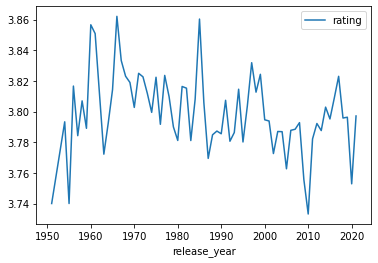

In [8]:
ocene_po_datumu_izida = albumi[["album_name", "artist_name", "rating", "release_year"]].groupby("release_year").mean()

ocene_po_datumu_izida.plot()

### Na zgornjem grafu vidimo povprečno oceno albumov, ki so bili izdani določenega leta. Albumi iz zečetka in sredine šestdesetih so visoko ocenjeni, tisti vmes pa precej nižje. Še en višek v oceni vidimo v sredini osemdesetih let, kar ni presenetljivo; hiti iz osemdesetih se še danes vrtijo na skoraj vsaki frekvenci radia. Spodaj je tabela albumov iz osemdesetih, sortiranih po oceni: 

In [9]:
(albumi[(albumi["release_year"] >= 1980) & (albumi["release_year"] <= 1990)])[["album_name", "artist_name", "rating", "release_year"]].sort_values("rating", ascending=False)

,album_name,artist_name,rating,release_year
id,,,,
42,The Name of This Band Is Talking Heads,Talking Heads,4.21,1982
55,Stop Making Sense,Talking Heads,4.18,1984
26,Hounds of Love,Kate Bush,4.15,1985
86,"Live at the Harlem Square Club, 1963",Sam Cooke,4.13,1985
66,Live After Death,Iron Maiden,4.13,1985
...,...,...,...,...
2323,Tales From the Twilight World,Blind Guardian,3.67,1990
2407,Danzig,Danzig,3.66,1988
2423,Torture Garden,Naked City,3.65,1990


### Najslabše leto za glasbene navdušence je očitno leto 2010. Spodaj lahko vidimo, da ima najbolje ocenjen album iz tega leta, glasba za videoigrico Super Mario Galaxy 2, povprečno oceno 3.9.

In [10]:
(albumi[albumi["release_year"] == 2010])[["album_name", "artist_name", "rating", "release_year"]].sort_values("rating", ascending=False)

,album_name,artist_name,rating,release_year
id,,,,
614,Super Mario Galaxy 2,Mario Galaxy Orchestra,3.90,2010
395,Cosmogramma,Flying Lotus,3.81,2010
663,The ArchAndroid,Janelle Monáe,3.79,2010
911,Daughters,Daughters,3.78,2010
634,Teen Dream,Beach House,3.76,2010
1389,The Social Network,Trent Reznor and Atticus Ross,3.75,2010
1814,Spiegel; Monumentum; Momente,SWR Sinfonieorchester,3.74,2010
1834,Spiegel; Monumentum; Momente,SWR Sinfonieorchester,3.74,2010
2003,Madlib Medicine Show: No. 5 - History of the L...,Madlib,3.73,2010


In [11]:
zanri = pd.read_csv("genres.csv")

In [12]:
albumi_z_zanri = pd.merge(albumi, zanri, left_on="id", right_on="id_albuma")

albumi_z_zanri

,album_name,artist_name,release_date,rating,nr_of_ratings,release_year,decade,id_albuma,genre
0,OK Computer,Radiohead,16 June 1997,4.23,70888,1997,199,1,Alternative Rock
1,OK Computer,Radiohead,16 June 1997,4.23,70888,1997,199,1,Art Rock
2,Wish You Were Here,Pink Floyd,12 September 1975,4.29,49028,1975,197,2,Progressive Rock
3,Wish You Were Here,Pink Floyd,12 September 1975,4.29,49028,1975,197,2,Art Rock
4,In the Court of the Crimson King,King Crimson,10 October 1969,4.30,45260,1969,196,3,Progressive Rock
...,...,...,...,...,...,...,...,...,...
4476,Shaft,Isaac Hayes,July 1971,3.69,1720,1971,197,2448,Soul
4477,Shaft,Isaac Hayes,July 1971,3.69,1720,1971,197,2448,Funk
4478,Shaft,Isaac Hayes,July 1971,3.69,1720,1971,197,2448,Film Score
4479,Takin' Off,Herbie Hancock,October 1962,3.70,1560,1962,196,2449,Post-Bop


In [13]:
albumi_z_zanri[["genre", "rating"]].groupby("genre").mean().sort_values("rating", ascending=False)

,rating
genre,
Dance-Punk,4.110000
Spaghetti Western,4.100000
Acid Rock,4.092000
French House,4.030000
Jam Band,3.968462
...,...
Merseybeat,3.650000
Cloud Rap,3.630000
AOR,3.630000


<AxesSubplot:xlabel='genre'>

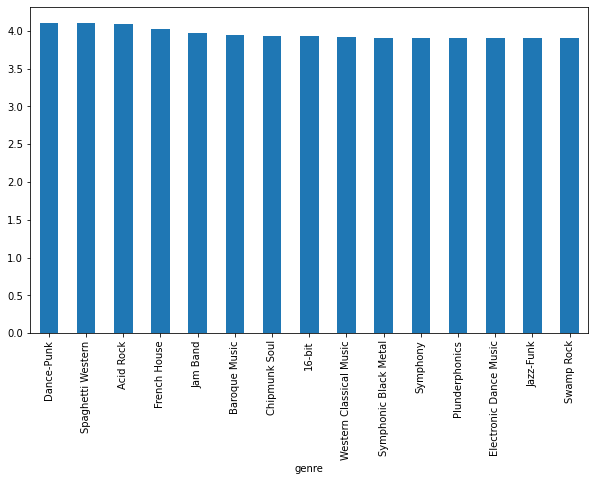

In [105]:
top_15_genres = albumi_z_zanri.groupby("genre").mean().sort_values("rating", ascending=False).head(15)
top_15_genres.rating.plot.bar(figsize=(10, 6))

### Zgornji graf predstavlja povprečno oceno albumov v odvisnosti od žanra. Vidimo, da je Dance-Punk s povprečno oceno 4.11 od 5 po ocenah na samem vrhu med žanri. Tik za njim je Spaghetti Western (4.10) in popularen Acid Rock (4.09). Slednjega so zaznamovali legendarni glasbeniki The Doors, The Jimi Hendrix Experience, Deep Purple in drugi.

### Naslednji zanimiv podatek je najbolj popularen žanr vsakega desetletja.

In [15]:
albumi_z_zanri["decade"] = albumi_z_zanri["release_year"].transform(lambda x: x//10)

In [16]:
zanri_po_letih = albumi_z_zanri.groupby(["decade", "genre"]).size().reset_index(name="count")
zanri_po_letih[zanri_po_letih.groupby(["decade"], sort=False)["count"].transform(max) == zanri_po_letih["count"]]


,decade,genre,count
25,195,Vocal Jazz,14
100,196,Post-Bop,23
262,197,Progressive Rock,104
391,198,Heavy Metal,41
483,199,Alternative Rock,54
835,200,Progressive Metal,40
1075,201,Video Game Music,24
1135,202,Singer/Songwriter,8


### Iz zgornje tabele lahko razberemo, kateri žanr je prevladoval skozi desetletja. Od sedemdesetih do začetka novega tisočletja so bile najpopularnejše različne zvrsti Rocka in Metala. Zanimiva so leta med 2010 in 2020, kjer je prevladovala glasba za računalniške igrice; v spodnji tabeli lahko opazimo ikonične naslove kot Super Mario, Zelda in DOOM. Visoko oceno (4.0) so ljubitelji glasbe dodelili albumu "Minecraft: Volume Alpha", v katerega je skladatelj C418 med drugim vključil danes izjemno prepoznavno skladbo z naslovom ["Sweden"](https://www.youtube.com/watch?v=aBkTkxKDduc).

In [17]:
albumi_z_zanri[(albumi_z_zanri["decade"] == 201) & (albumi_z_zanri["genre"] == "Video Game Music")]

,album_name,artist_name,release_date,rating,nr_of_ratings,release_year,decade,id_albuma,genre
302,Minecraft: Volume Alpha,C418,4 March 2011,4.00,9965,2011,201,158,Video Game Music
614,UNDERTALE,"Toby ""Radiation"" Fox",13 August 2015,3.92,3979,2015,201,331,Video Game Music
861,Minecraft: Volume Beta,C418,9 November 2013,3.90,2078,2013,201,464,Video Game Music
867,Fight Songs: The Music of Team Fortress 2,Valve Studio Orchestra,21 April 2017,3.90,893,2017,201,467,Video Game Music
874,Bloodborne,Ryan Amon,24 March 2015,3.92,700,2015,201,469,Video Game Music
938,LISA,Widdly 2 Diddly,29 October 2014,3.90,625,2014,201,500,Video Game Music
943,Disco Elysium,British Sea Power,23 December 2019,3.88,677,2019,201,502,Video Game Music
978,Outer Wilds,Andrew Prahlow,1 June 2019,3.92,370,2019,201,524,Video Game Music
1023,Sonic the Hedgehog CD Original Soundtrack 20th...,尾形雅史,23 November 2011,3.89,580,2011,201,550,Video Game Music
1095,Hollow Knight,Christopher Larkin,10 February 2017,3.89,891,2017,201,588,Video Game Music


### Sedaj si oglejmo izvajalce in podatke, povezane z njimi.  

In [116]:
izvajalci = pd.read_csv("artists.csv")

izvajalci

,id_artist,artist_name
0,1,Radiohead
1,2,Pink Floyd
2,3,King Crimson
3,4,Kendrick Lamar
4,5,My Bloody Valentine
...,...,...
1474,1475,Fever Ray
1475,1476,The Chemical Brothers
1476,1477,toe
1477,1478,The Crazy World of Arthur Brown


In [119]:
albumi_z_izvajalci = pd.merge(albumi, izvajalci, left_on="artist_name", right_on="artist_name")

artists_by_rating = pd.merge(albumi_z_izvajalci.groupby("id_artist").mean().sort_values("rating", ascending=False), izvajalci, left_on="id_artist", right_on="id_artist")

In [120]:
artists_by_rating

,id_artist,rating,nr_of_ratings,release_year,decade,artist_name
0,10,4.20,31127.0,1994.0,199.0,Nas
1,12,4.19,27787.0,1993.0,199.0,Wu-Tang Clan
2,14,4.14,33214.0,1991.0,199.0,Slint
3,62,4.13,2906.0,1985.0,198.0,Sam Cooke
4,20,4.13,25949.0,1977.0,197.0,Television
...,...,...,...,...,...,...
1474,1025,3.62,770.0,2018.0,201.0,Joel
1475,1365,3.61,14245.0,1983.0,198.0,Swans
1476,1397,3.59,15161.0,1991.0,199.0,Red Hot Chili Peppers
1477,1396,3.57,16188.0,1977.0,197.0,Sex Pistols


<AxesSubplot:xlabel='artist_name'>

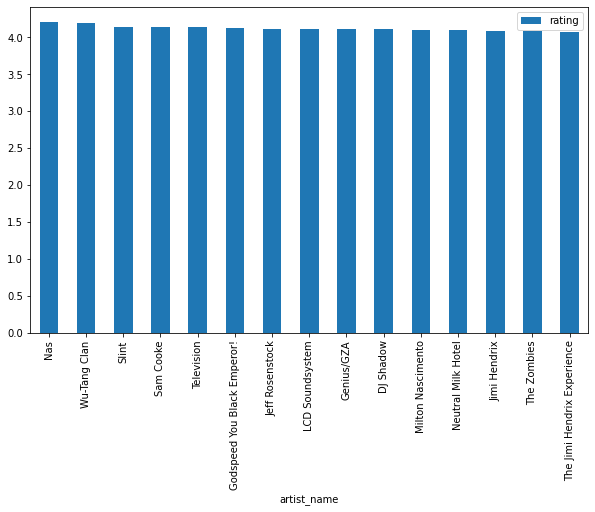

In [126]:
top_15_artists = artists_by_rating.head(15)

top_15_artists.plot.bar(x="artist_name", y="rating", figsize=(10, 6))

### Zgornji graf predstavlja povprečno oceno albumov 15 najvišje ocenjenih izvajalcev. Najbolje ocenjene albume ima izvajalec Nas s povprečno oceno 4.2, sledita mu Wu-Tang Clan in Slint.

<AxesSubplot:xlabel='artist_name'>

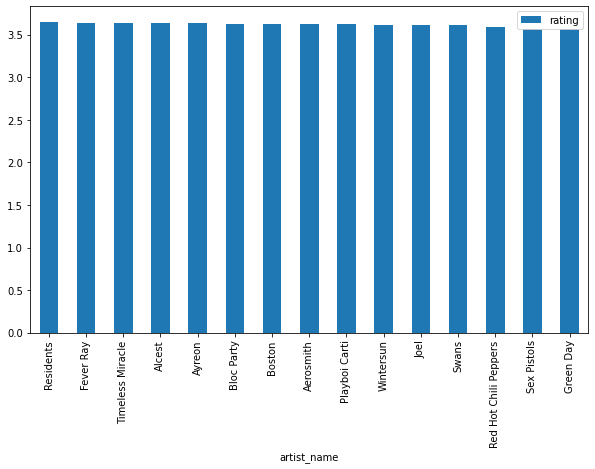

In [125]:
bottom_15_artists = artists_by_rating.tail(15)
bottom_15_artists.plot.bar(x="artist_name", y="rating", figsize=(10, 6))

### Zgornji graf prikazuje povprečno oceno 15 izvajalcev z najslabše ocenjenimi albumi. Presenetljivo so na zadnjih treh mestih svetovno znani rock bandi Red Hot Chilly Peppers, Sex Pistols in Green Day.

In [123]:
album_count = pd.merge(albumi_z_izvajalci[["album_name", "id_artist"]].groupby("id_artist").count().rename(columns={"album_name":"album_count"}), artists_by_rating[["artist_name", "id_artist", "rating"]], left_on="id_artist", right_on="id_artist")[["artist_name", "album_count", "rating"]]

<AxesSubplot:xlabel='album_count', ylabel='rating'>

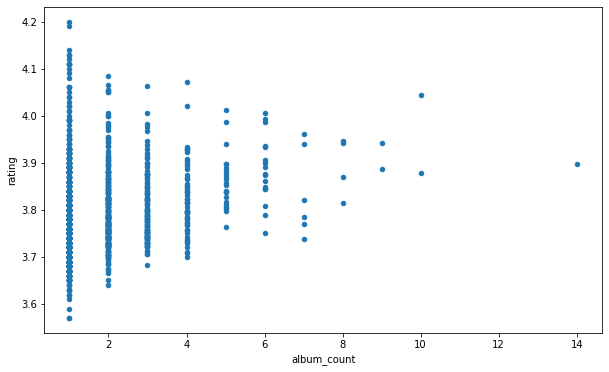

In [124]:
album_count.plot.scatter(x="album_count", y="rating", figsize=(10, 6))

### Zgornji graf predstavlja korelacijo med številom albumov izvajalca in povprečno oceno njegovih albumov. Opazimo pričakovano; več, kot ima izvajalec albumov, bolj "povprečno" skupno oceno imajo. Ugotavljamo, da število albumov izvajalca ne pomeni niti višje niti nižje povprečne ocene njegovih albumov.

### Sedaj preverimo še, ali je dobra ocena albuma povezana z veliki številom ocen.

<AxesSubplot:xlabel='nr_of_ratings', ylabel='rating'>

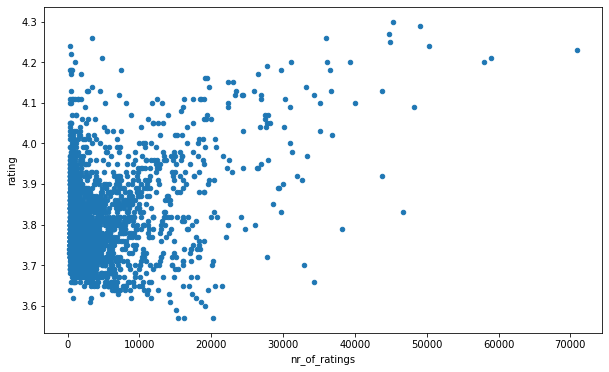

In [127]:
albumi.plot.scatter(x="nr_of_ratings", y="rating", figsize=(10, 6))

### Zgornji graf res kaže na to, da imajo albumi z veliko ocenami visoko povprečno oceno, vendar ne velja obratno: pri albumih z zelo majhnih številom ocen so ocene zelo raznolike. Ko število ocen preseže 1000, se začne povprečna ocena res višati z številom ocen.

### Analizo zaključujem z iskanjem povezave med besedami, ki opisujejo nek album, in žanri tega albuma. Ali lahko iz teh besed napovemo žanr albuma? 

In [29]:
opisne_besede = pd.read_csv("descriptive_words.csv")

album_in_opisne_besede = pd.merge(albumi, opisne_besede, left_on="id", right_on="id_albuma")

verjetnosti_zanrov = zanri.groupby("genre").count()["id_albuma"] / len(albumi)

In [30]:
verjetnosti_zanrov

genre
16-bit                     0.002042
2 Tone                     0.000408
AOR                        0.000408
Abstract Hip Hop           0.011842
Acid Rock                  0.002042
                             ...   
Western Classical Music    0.000408
Wonky                      0.000817
Yacht Rock                 0.000408
Zeuhl                      0.002858
Zolo                       0.000817
Name: id_albuma, Length: 473, dtype: float64

In [31]:
album_in_opisne_besede

,album_name,artist_name,release_date,rating,nr_of_ratings,release_year,decade,id_albuma,descriptive_word
0,OK Computer,Radiohead,16 June 1997,4.23,70888,1997,199,1,melancholic
1,OK Computer,Radiohead,16 June 1997,4.23,70888,1997,199,1,anxious
2,OK Computer,Radiohead,16 June 1997,4.23,70888,1997,199,1,futuristic
3,OK Computer,Radiohead,16 June 1997,4.23,70888,1997,199,1,male vocals
4,OK Computer,Radiohead,16 June 1997,4.23,70888,1997,199,1,existential
...,...,...,...,...,...,...,...,...,...
18725,Shaft,Isaac Hayes,July 1971,3.69,1720,1971,197,2448,lush
18726,Takin' Off,Herbie Hancock,October 1962,3.70,1560,1962,196,2449,instrumental
18727,Takin' Off,Herbie Hancock,October 1962,3.70,1560,1962,196,2449,improvisation
18728,Takin' Off,Herbie Hancock,October 1962,3.70,1560,1962,196,2449,rhythmic


In [32]:
def list_to_series(list):
    return pd.Series(sorted(set(list)))

besede_po_albumih = opisne_besede.groupby("id_albuma")["descriptive_word"].apply(list).apply(list_to_series)

In [33]:
besede_po_zanrih = pd.merge(
    besede_po_albumih.stack().reset_index()[["id_albuma", 0]],
    zanri,
    left_on="id_albuma",
    right_on="id_albuma"
).rename(columns={0: "word"})[["word", "genre"]]

In [48]:
st_pojavitev_besed_po_zanrih = besede_po_zanrih.groupby(["word", "genre"]).size().unstack()

In [49]:
st_pojavitev_besed_po_zanrih

genre,16-bit,2 Tone,AOR,Abstract Hip Hop,Acid Rock,Acoustic Blues,Acoustic Rock,Afoxé,Afro-Cuban Jazz,Afro-Funk,...,Vaporwave,Video Game Music,Viking Metal,Vocal Jazz,West Coast Hip Hop,Western Classical Music,Wonky,Yacht Rock,Zeuhl,Zolo
word,,,,,,,,,,,,,,,,,,,,,
...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Christian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Halloween,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Islamic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LGBT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vulgar,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
war,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


### Definirajmo verjetnost besed v opisu albuma nekega žanra:

In [51]:
verjetnosti_besed_v_zanru =  (st_pojavitev_besed_po_zanrih / zanri.groupby("genre").size()).fillna(0.001)

In [52]:
verjetnosti_besed_v_zanru

genre,16-bit,2 Tone,AOR,Abstract Hip Hop,Acid Rock,Acoustic Blues,Acoustic Rock,Afoxé,Afro-Cuban Jazz,Afro-Funk,...,Vaporwave,Video Game Music,Viking Metal,Vocal Jazz,West Coast Hip Hop,Western Classical Music,Wonky,Yacht Rock,Zeuhl,Zolo
word,,,,,,,,,,,,,,,,,,,,,
...,0.001,0.001,0.001,0.001000,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.039216,0.001,0.001000,0.001,0.001,0.001,0.001,0.001000,0.001
Christian,0.001,0.001,0.001,0.001000,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001,0.001,0.001000,0.001
Halloween,0.001,0.001,0.001,0.001000,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001,0.001,0.001000,0.001
Islamic,0.001,0.001,0.001,0.001000,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001,0.001,0.001000,0.001
LGBT,0.001,0.001,0.001,0.001000,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.001000,0.001,0.001000,0.150,0.001,0.001,0.001,0.001000,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vocal group,0.001,0.001,0.001,0.001000,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.001000,0.001,0.001000,0.001,0.001,0.001,0.001,0.001000,0.001
vulgar,0.001,0.001,0.001,0.068966,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.001000,0.001,0.001000,0.050,0.001,0.001,0.001,0.001000,0.001
war,0.001,0.001,0.001,0.001000,0.001,0.001,0.001000,0.001,0.001,0.001,...,0.001,0.039216,0.001,0.001000,0.001,0.001,0.001,0.001,0.285714,0.001


### Sedaj lahko definiramo funkcijo, ki za argument sprejme seznam besed in vrne najverjetnejši žanr.

In [77]:
def verjetnost_zanra(seznam_besed):
    return (verjetnosti_besed_v_zanru[verjetnosti_besed_v_zanru.index.isin(seznam_besed)].prod() * verjetnosti_zanrov)

def najverjetnejsi_zanr(seznam_besed):
    return verjetnost_zanra(seznam_besed).idxmax()

### Preizkusimo jo na nekaj primerih:

In [79]:
najverjetnejsi_zanr(["dark"])

'Post-Punk'

In [80]:
najverjetnejsi_zanr(["mysterious", "melancholic", "political"])

'Trip Hop'

In [81]:
najverjetnejsi_zanr(["calm", "male vocals", "pessimistic"])

'Folk Rock'

In [93]:
najverjetnejsi_zanr(["surreal", "melancholic"])

'Art Rock'

### Za zadnji preizkus sem na spletni strani, s katere sem pridobila podatke, poiskala svoj najljubši album, ["Melophobia"](https://rateyourmusic.com/release/album/cage-the-elephant/melophobia/), izvajalca Cage the elephant. Opisujejo ga besede _male vocals, energetic, longing, lonely, introspective, anxious, bittersweet, love, noisy, psychedelic, melodic, dense, melancholic_. Sedaj s temi besedami uporabim zgornjo funkcijo:

In [96]:
verjetnost_zanra(
    ["male vocals", "energetic", "longing", "lonely", "introspective", "anxious", "bittersweet", "love", "noisy", "psychedelic", "melodic", "dense", "melancholic"]
    ).sort_values(ascending=False)

genre
Alternative Rock            8.698819e-12
Indie Rock                  6.146000e-12
Neo-Psychedelia             4.123861e-14
Power Pop                   2.512645e-14
Art Pop                     1.180927e-14
                                ...     
Bebop                       4.083299e-43
Spectralism                 4.083299e-43
Stride                      4.083299e-43
Traditional Black Gospel    4.083299e-43
EAI                         4.083299e-43
Length: 473, dtype: float64

### Funkcija je napovedala žanre **Alternative Rock**, **Indie Rock**, **Neo-Psychadelia** in **Power Pop**. Na spletni strani so album opredelili kot **Indie Rock**, **Garage Rock Revival**, **Neo-Psychedelia** in **Noise Pop**. Funkcija je torej zelo dobro napovedala žanr.

## Zaključek

### Analizirala sem 5000 albumov z največjim številom ocen na spletni strani [RateYourMusic](https://rateyourmusic.com/). Zbrala sem podatke o naslovu albuma, izvajalcu, datumu in letu izdaje, povprečni oceni, številu ocen uporabnikov spletne strani, žanrih in opisnih besedah.

### V prvem delu analize podatkov sem si ogledala nekaj preprostih informacij. Najvišje ocenjen album je "In the Court of the Crimson King" izvajalca Kinga Crimsona, najbolje ocenjen album trenutnega desetletja pa je izdal band "King Glizzard & The Lizard Wizard". 

### V naslednjih analizah sem ugotovila, da so bili najbolje ocenjeni albumi izdani v 60. in 80. letih, nato pa je povprečna ocena albumov začela padati vse do leta 2010. Po letu 2010 se je ocena nekoliko zvišala. Ugotovila sem tudi, da je Dance-Punk najbolje ocenjen žanr med vsemi iz mojega bazena podatkov in da imajo najvišjo povprečno oceno albumi izvajalca Nas-a.

### Z analizo korelacije med številom izdanih albumov nekega izvajalca in povprečno oceno vseh njegovih albumov sem potrdila, da se s številom albumov skupna ocena približuje povprečni. Ugotovila sem tudi, da ocena albuma narašča s številom ocen na spletni strani, z izjemo tistih albumov z zelo majhnih številom glasov.

### V zadnjem delu sem se posvetila izračunu verjetnosti žanra albuma glede na besede, ki ta album opisujejo. Napisala sem funkcijo, ki iz besed napove žanr. Za preverjanje natančnosti te funkcije sem poiskala podatke o albumu, ki ga ni v moji zbirki albumov za analizo, ter na njem uporabila funkcijo. Funkcija je pravilno napovedala 2 od 4 žanrov, ki so bili dodeljeni albumu, torej je precej natančna.